In [1]:
# Importing packages 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
#Read the Csv into dataframe using Pandas
absent = pd.read_csv("/Absenteeism_at_work.csv")
absent.head()

(740, 20)

In [4]:
absent.shape

(740, 20)

In [5]:
# Renaming with approriate column names
absent.columns=absent.columns.str.strip()
absent.columns=absent.columns.str.replace(" ","_")
absent.columns=absent.columns.str.replace("/","_")
absent.columns=absent.columns.str.replace("Son","Number_Of_Children")
absent.columns=absent.columns.str.replace("Pet","Number_Of_Pet")
absent.Work_load_Average_day=absent.Work_load_Average_day.str.replace(",","")

In [6]:
# Converting the feature Work_load_Average_day to float 
absent['Work_load_Average_day']= absent.Work_load_Average_day.astype('float64')
absent.Work_load_Average_day=absent.Work_load_Average_day/1000

#Create a dupilcate data frame one for exploration and one for modeling
absent_model=absent.copy()


In [7]:
absent['Month_of_absence']=absent['Month_of_absence'].astype('object')
absent['Month_of_absence'].replace([1,2,3,4,5,6,7,8,9,10,11,12],
                                   ['Jan','Feb','Mar','Apr','May','Jun','July','August','Sept','Oct','Nov','Dec'],inplace=True)

absent['Day_of_the_week']=absent['Day_of_the_week'].astype('object')
absent['Day_of_the_week'].replace([2,3,4,5,6],
                                   ['Mon','Tue','Wed','Thur','Fri'],inplace=True)

absent['Seasons']=absent['Seasons'].astype('object')
absent['Seasons'].replace([1,2,3,4],
                                   ['Summer','Autumn','Winter','Spring'],inplace=True)

absent['Education']=absent['Education'].astype('object')
absent['Education'].replace([1,2,3,4],
                                   ['School','Grad','PostGrad','Master and Doctor'],inplace=True)

for col in absent.columns:
    if(absent[col].name in ['Social_drinker','Social_smoker','Disciplinary_failure']):
        absent[col]=absent[col].astype('object')
        absent[col].replace([1,0],['Yes','No'],inplace=True)

In [8]:
#Checking Dtypes
absent_model.dtypes

Reason_for_absence                   int64
Month_of_absence                     int64
Day_of_the_week                      int64
Seasons                              int64
Transportation_expense               int64
Distance_from_Residence_to_Work      int64
Service_time                         int64
Age                                  int64
Work_load_Average_day              float64
Hit_target                           int64
Disciplinary_failure                 int64
Education                            int64
Number_Of_Children                   int64
Social_drinker                       int64
Social_smoker                        int64
Number_Of_Pet                        int64
Weight                               int64
Height                               int64
Body_mass_index                      int64
Absenteeism_time_in_hours            int64
dtype: object

In [9]:
absent.dtypes

Reason_for_absence                   int64
Month_of_absence                    object
Day_of_the_week                     object
Seasons                             object
Transportation_expense               int64
Distance_from_Residence_to_Work      int64
Service_time                         int64
Age                                  int64
Work_load_Average_day              float64
Hit_target                           int64
Disciplinary_failure                object
Education                           object
Number_Of_Children                   int64
Social_drinker                      object
Social_smoker                       object
Number_Of_Pet                        int64
Weight                               int64
Height                               int64
Body_mass_index                      int64
Absenteeism_time_in_hours            int64
dtype: object

In [10]:
# Removing Impossible values for month of absence
month_out = absent['Month_of_absence']==0
a= absent.loc[month_out]
b= a.index
for i in b:
    absent.drop(i,axis=0,inplace=True)
    
month_out = absent_model['Month_of_absence']==0
a= absent_model.loc[month_out]
b= a.index
for i in b:
    absent_model.drop(i,axis=0,inplace=True)
    

In [11]:
# Checking For Typos
for col in absent.columns:
    if(absent[col].dtype.name in ['category','object']):
        print absent[col].value_counts()

Mar       87
Feb       72
Oct       71
July      67
May       64
Nov       63
Jun       54
August    54
Apr       53
Sept      53
Jan       50
Dec       49
Name: Month_of_absence, dtype: int64
Mon     161
Wed     155
Tue     153
Fri     143
Thur    125
Name: Day_of_the_week, dtype: int64
Spring    195
Autumn    191
Winter    182
Summer    169
Name: Seasons, dtype: int64
No     697
Yes     40
Name: Disciplinary_failure, dtype: int64
School               608
PostGrad              79
Grad                  46
Master and Doctor      4
Name: Education, dtype: int64
Yes    418
No     319
Name: Social_drinker, dtype: int64
No     683
Yes     54
Name: Social_smoker, dtype: int64


In [12]:
# Removing Impossible values for Absenteeism_time_in_hours
Target_out=absent['Absenteeism_time_in_hours']>8
a=absent.loc[Target_out]
b=a.index
for val in b:
    absent.drop(val,axis=0,inplace=True)
    
Target_out=absent_model['Absenteeism_time_in_hours']>8
a=absent_model.loc[Target_out]
b=a.index
for val in b:
    absent_model.drop(val,axis=0,inplace=True)

In [13]:
absent.shape

(674, 20)

In [14]:
absent_model.shape

(674, 20)

# Task 2 DATA EXPLORATION

## Plot for Reason_for_absence

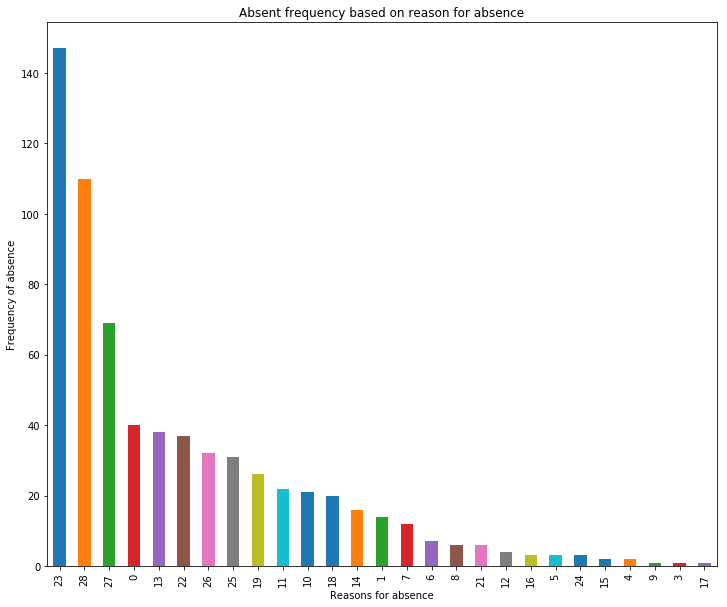

In [15]:
absent.Reason_for_absence.value_counts().plot(kind='bar',figsize=(12,10))
plt.title("Absent frequency based on reason for absence")
plt.xlabel("Reasons for absence")
plt.ylabel("Frequency of absence")
plt.show()

# Labels For the categories in graph

 #        1 : Certain infectious and parasitic diseases 
  #       2 : Neoplasms
   #      3 : Diseases of the blood and blood-forming organs and certain disorders involving the immune mechanism
    #     4 : Endocrine, nutritional and metabolic diseases 
     #    5 : Mental and behavioural disorders 
      #   6 : Diseases of the nervous system 
    #     7 : Diseases of the eye and adnexa 
    #     8 : Diseases of the ear and mastoid process 
    #     9 : Diseases of the circulatory system 
    #    10 : Diseases of the respiratory system 
    #     11 : Diseases of the digestive system 
    #     12 : Diseases of the skin and subcutaneous tissue 
    #     13 : Diseases of the musculoskeletal system and connective tissue 
    #     14 : Diseases of the genitourinary system 
    #     15 : Pregnancy, childbirth and the puerperium 
    #     16 : Certain conditions originating in the perinatal period
    #     17 : Congenital malformations, deformations and chromosomal abnormalities 
    #     18 : Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified 
    #     19 : Injury, poisoning and certain other consequences of external causes 
    #     20 : External causes of morbidity and mortality 
    #     21 : Factors influencing health status and contact with health services.
    #     and the 7 categories without (CID) are :
        
    #     22 : patient follow-up
    #     23 : Medical consultation
    #     24 : Blood Donation
    #     25 : Laboratory examination
    #     26 : Unjustified absence
    #     27 : Physiotherapy
    #     28 : Dental consultation


## Plot for Day_of_the_week

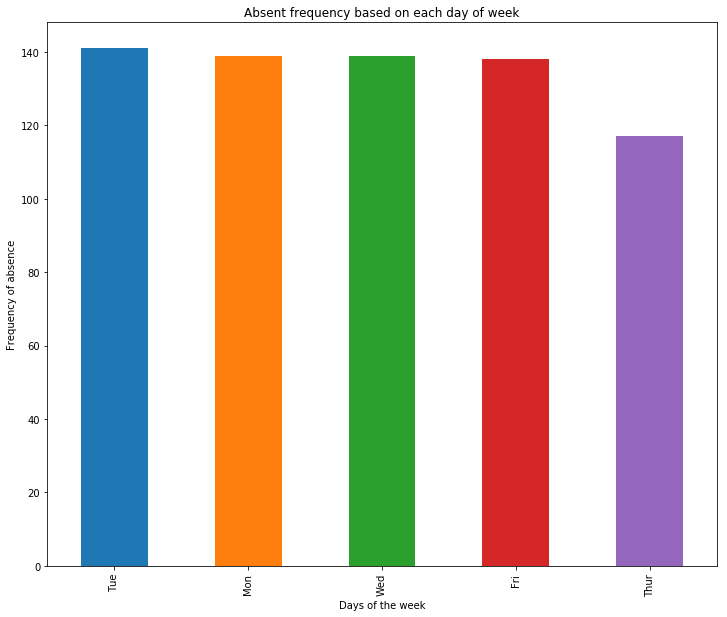

In [16]:
absent.Day_of_the_week.value_counts().plot(kind='bar',figsize=(12,10))
plt.title("Absent frequency based on each day of week")
plt.xlabel("Days of the week")
plt.ylabel("Frequency of absence")
plt.show()

## Plot for Month_of_absence

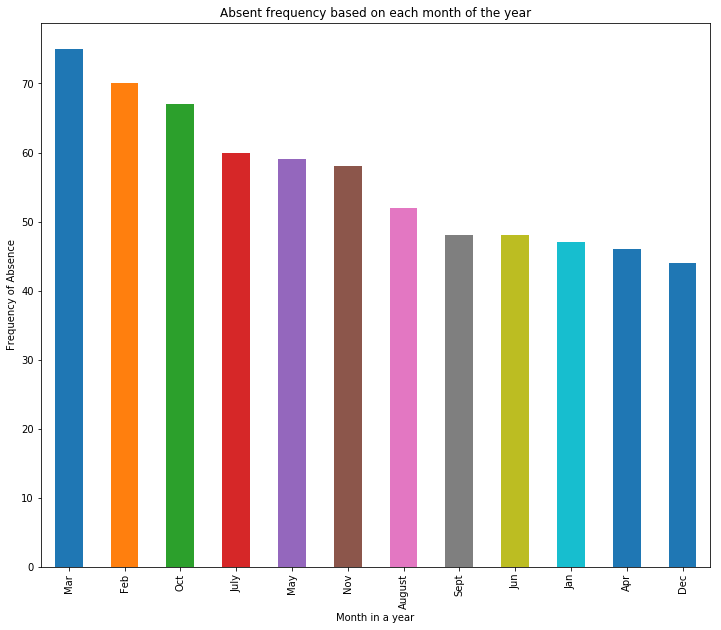

In [17]:
absent.Month_of_absence.value_counts().plot(kind='bar',figsize=(12,10))
plt.title("Absent frequency based on each month of the year")
plt.xlabel("Month in a year")
plt.ylabel("Frequency of Absence")
plt.show()

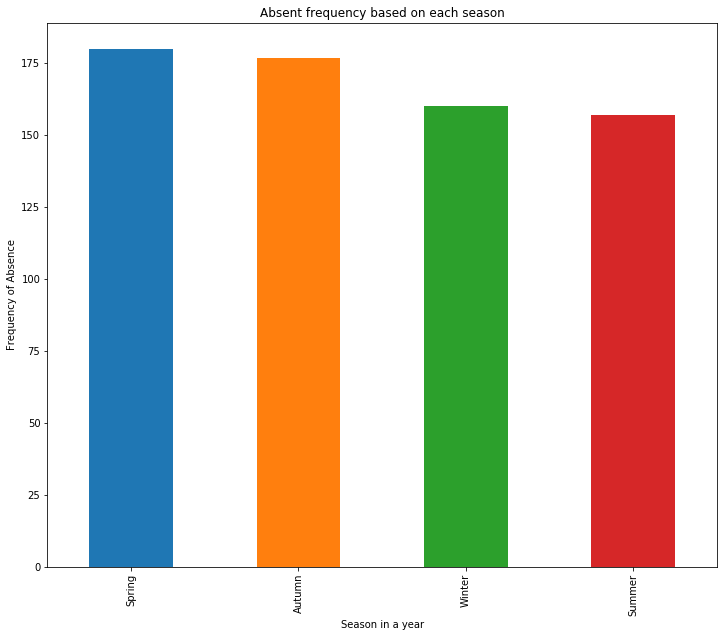

In [18]:
absent.Seasons.value_counts().plot(kind='bar',figsize=(12,10))
plt.title("Absent frequency based on each season")
plt.xlabel("Season in a year")
plt.ylabel("Frequency of Absence")
plt.show()

## Plot for Disciplinary_failure

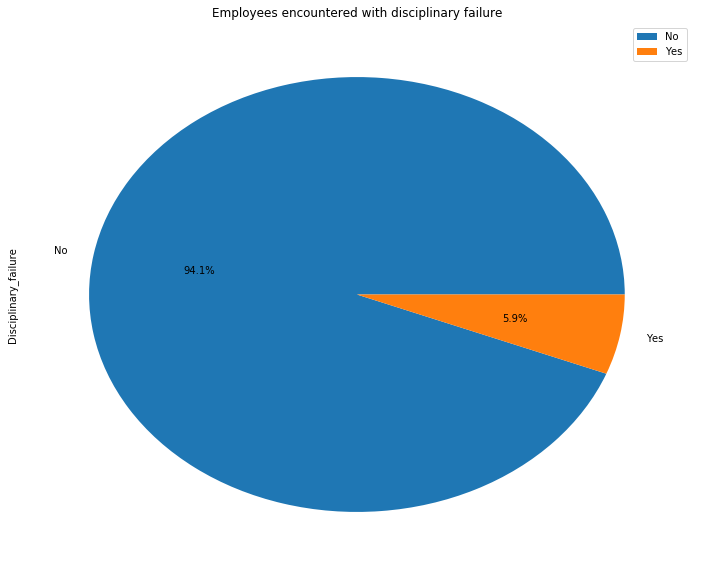

In [19]:
absent.Disciplinary_failure.value_counts().plot(kind='pie',figsize=(12,10),autopct='%1.1f%%')
plt.title("Employees encountered with disciplinary failure")
plt.legend()
plt.show()

## Plot for Education

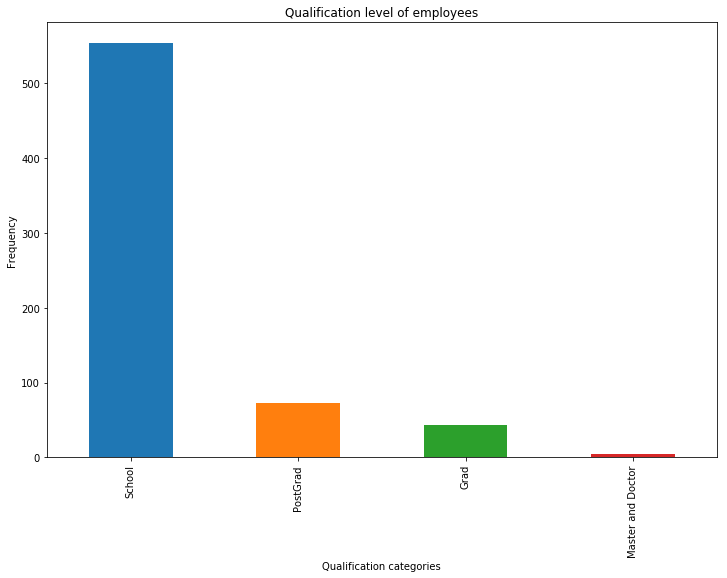

In [20]:
absent.Education.value_counts().plot(kind='bar',figsize=(12,8))
plt.title("Qualification level of employees")
plt.xlabel("Qualification categories")
plt.ylabel("Frequency")
plt.show()

## Plot for Social_drinker

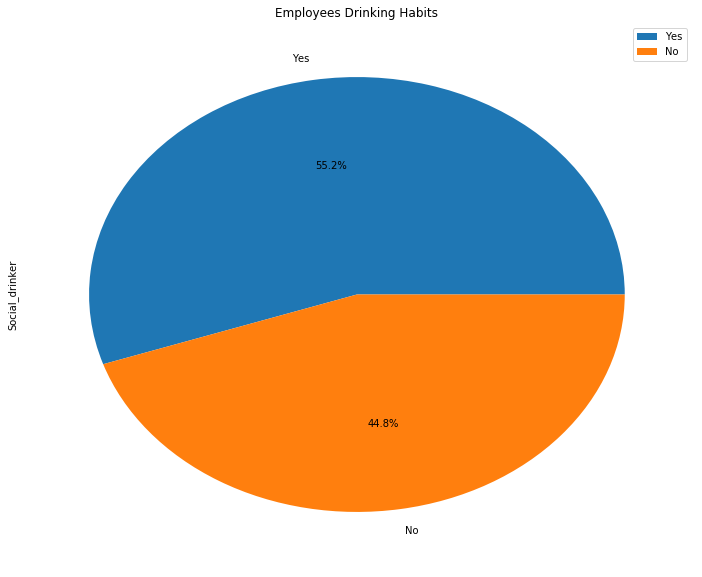

In [21]:
absent.Social_drinker.value_counts().plot(kind='pie',figsize=(12,10),autopct='%1.1f%%')
plt.title("Employees Drinking Habits")
plt.legend()
plt.show()

## Plot for Social_smoker

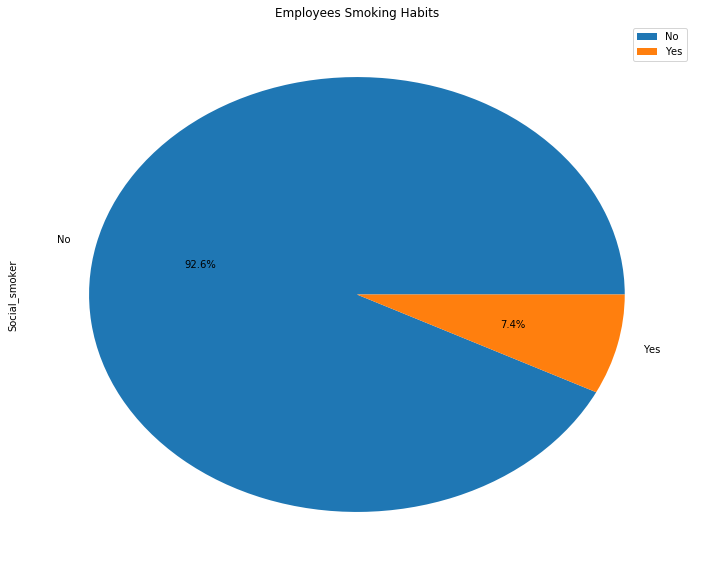

In [22]:
absent.Social_smoker.value_counts().plot(kind='pie',figsize=(12,10),autopct='%1.1f%%')
plt.title("Employees Smoking Habits")
plt.legend()
plt.show()

## Plot for Transportation_expense

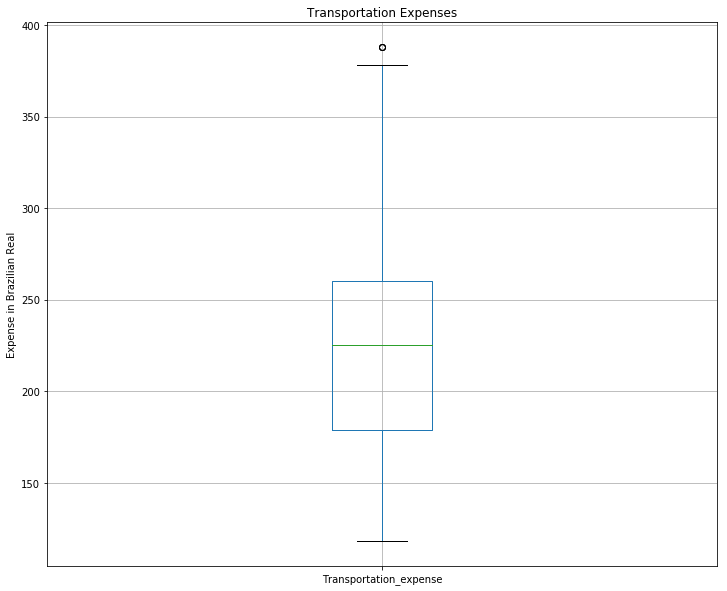

In [23]:
absent.Transportation_expense.plot(kind='box',figsize=(12,10))
plt.title('Transportation Expenses')
plt.ylabel('Expense in Brazilian Real')
plt.grid()
plt.show()


## Plot for Distance_from_Residence_to_Work

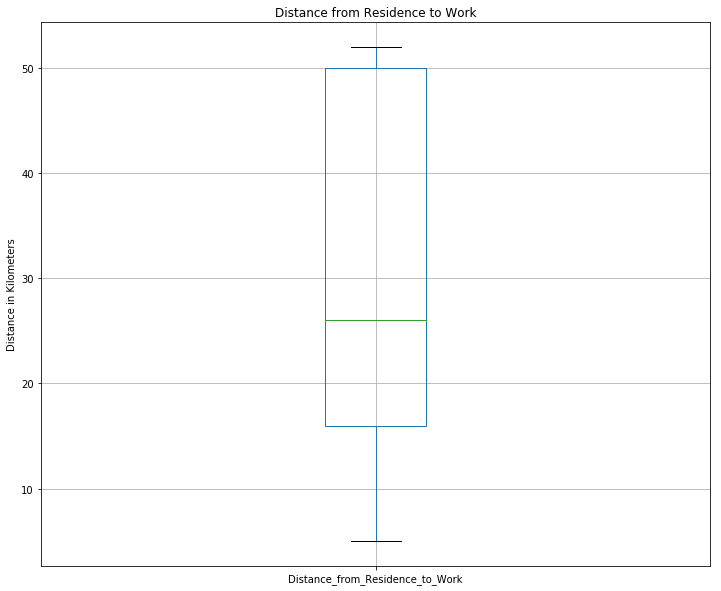

In [24]:
absent.Distance_from_Residence_to_Work.plot(kind='box',figsize=(12,10))
plt.title('Distance from Residence to Work')
plt.ylabel('Distance in Kilometers')
plt.grid()
plt.show()

## Plot for Service_time

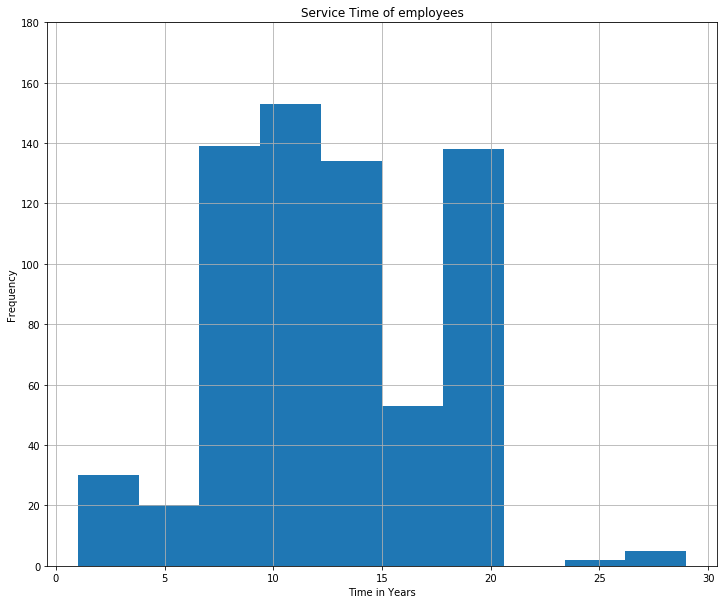

In [25]:
absent.Service_time.plot(kind='hist',ylim=(0,180),figsize=(12,10))
plt.title('Service Time of employees')
plt.xlabel('Time in Years')
plt.ylabel('Frequency')
plt.grid()
plt.show()

## Plot for Age

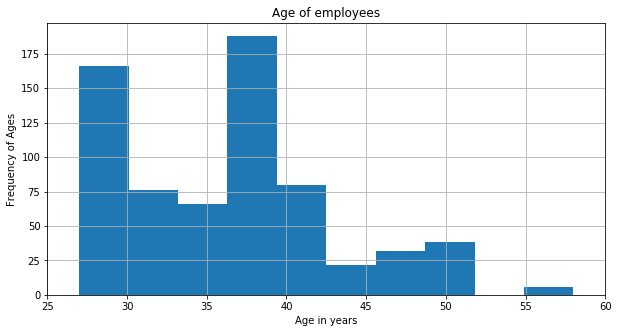

In [26]:
absent.Age.plot(kind='hist',figsize=(10,5),xlim=(25,60))
plt.title('Age of employees')
plt.xlabel('Age in years')
plt.ylabel('Frequency of Ages')
plt.grid()
plt.show()

## Plot for Work_load_Average_day

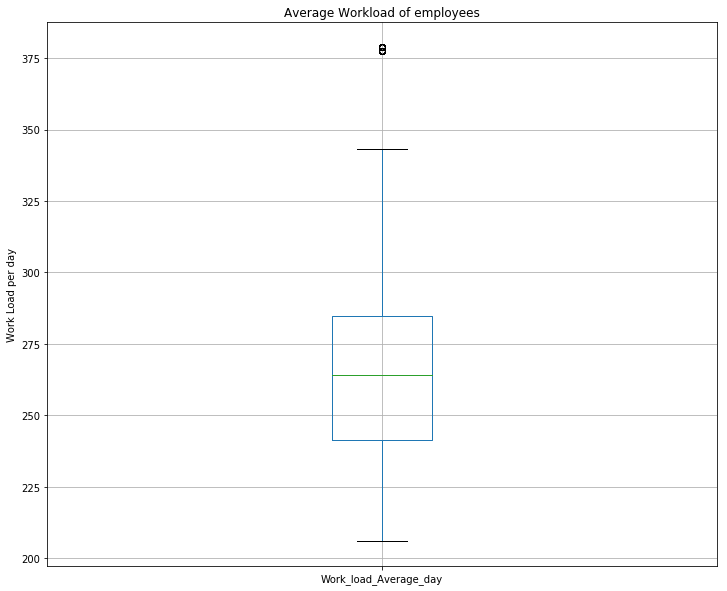

In [27]:
absent.Work_load_Average_day.plot(kind='box',figsize=(12,10))
plt.title('Average Workload of employees')
plt.ylabel('Work Load per day')
plt.grid()
plt.show()

## Plot for Hit_target

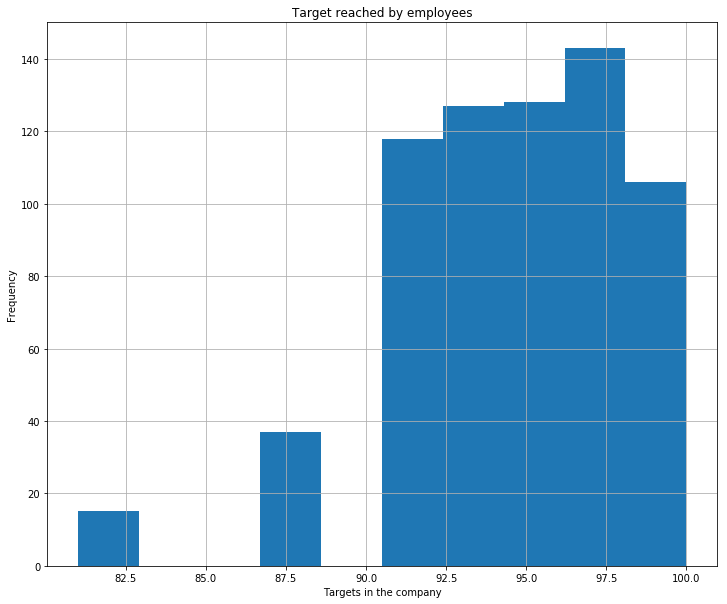

In [28]:
absent.Hit_target.plot(kind='hist',figsize=(12,10))
plt.title('Target reached by employees')
plt.ylabel('Frequency')
plt.xlabel('Targets in the company')
plt.grid()
plt.show()

## Plot for Number_Of_Children

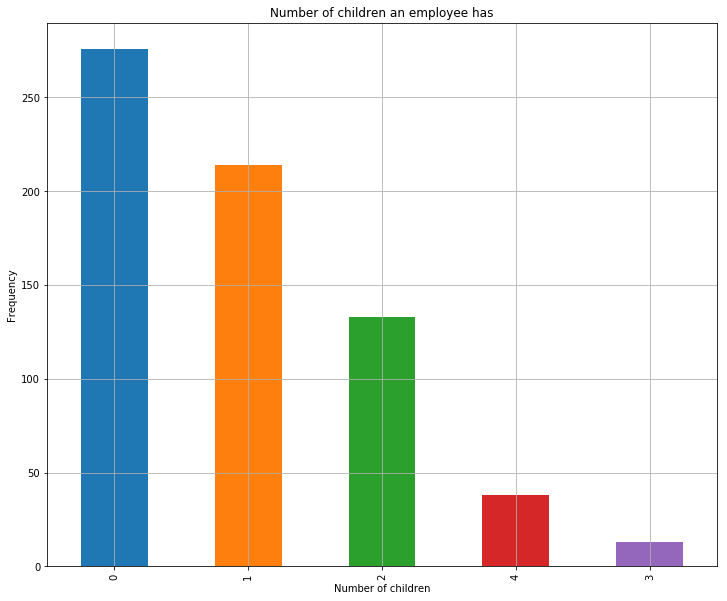

In [29]:
absent.Number_Of_Children.value_counts().plot(kind='bar',figsize=(12,10))
plt.title("Number of children an employee has")
plt.ylabel('Frequency')
plt.xlabel('Number of children')
plt.grid()
plt.show()

## Plot for Number_Of_Pet

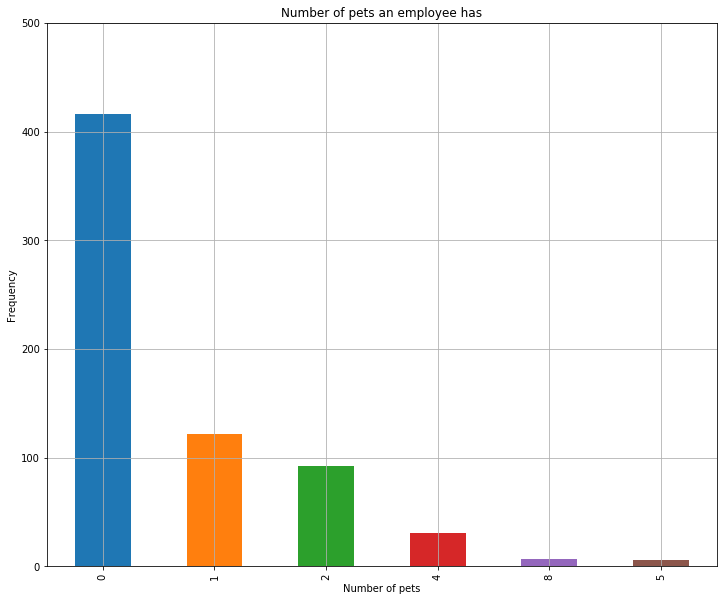

In [30]:
absent.Number_Of_Pet.value_counts().plot(kind='bar',figsize=(12,10),ylim=(0,500))
plt.title("Number of pets an employee has")
plt.ylabel('Frequency')
plt.xlabel('Number of pets')
plt.grid()
plt.show()

## Plot for Weight

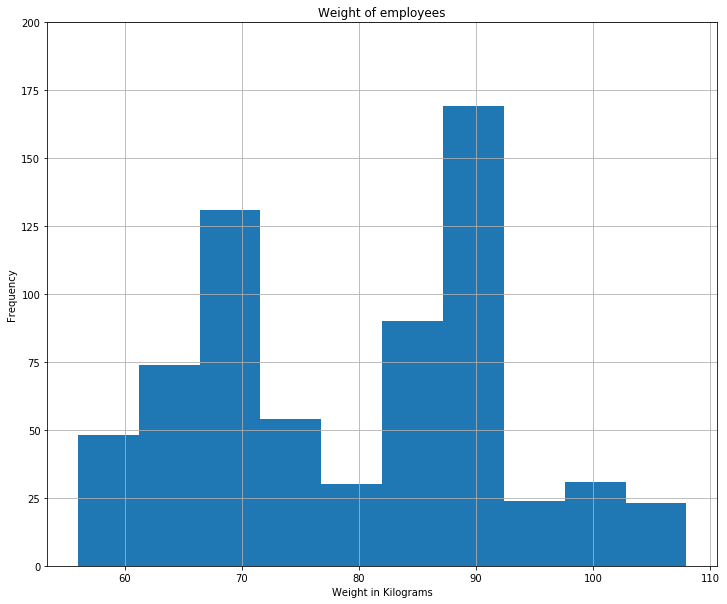

In [31]:
absent.Weight.plot(kind='hist',figsize=(12,10),ylim=(0,200))
plt.title("Weight of employees")
plt.ylabel('Frequency')
plt.xlabel('Weight in Kilograms')
plt.grid()
plt.show()

## Plot for Height

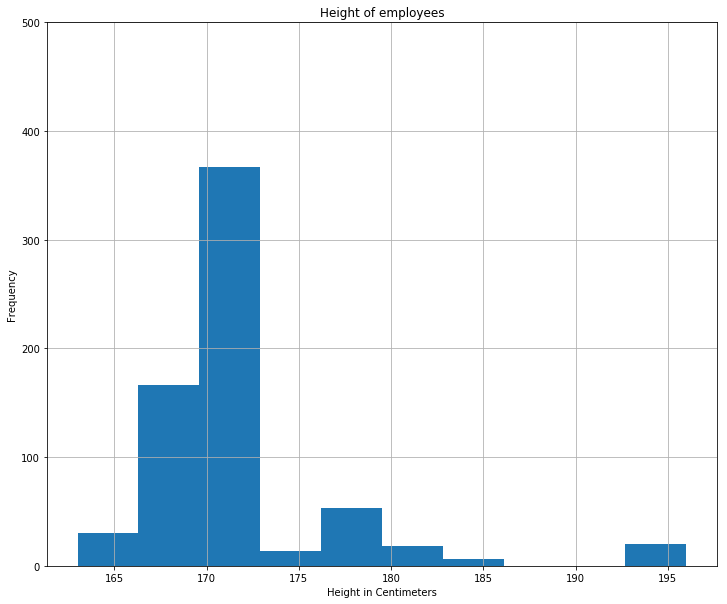

In [32]:
absent.Height.plot(kind='hist',figsize=(12,10),ylim=(0,500))
plt.title("Height of employees")
plt.ylabel('Frequency')
plt.xlabel('Height in Centimeters')
plt.grid()
plt.show()

## Plot for Body_mass_index

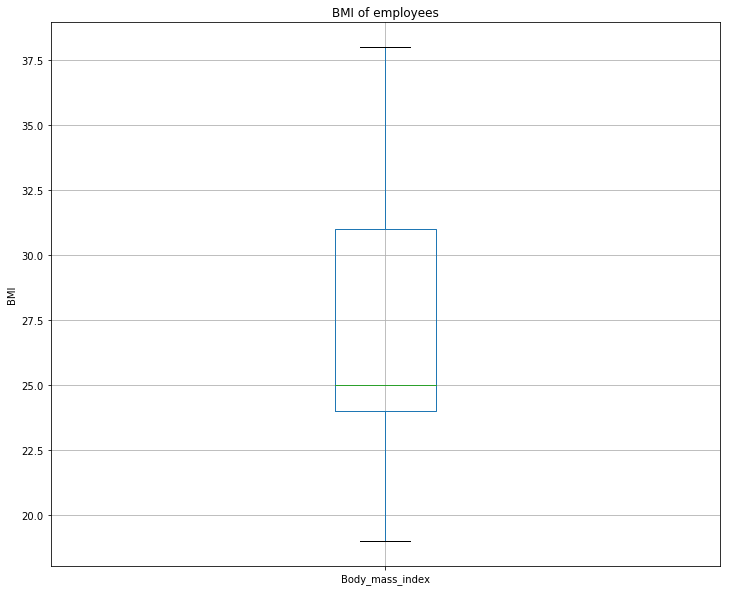

In [33]:
absent.Body_mass_index.plot(kind='box',figsize=(12,10))
plt.title("BMI of employees")
plt.ylabel('BMI')
plt.grid()
plt.show()

## Plot for Absenteeism_time_in_hours

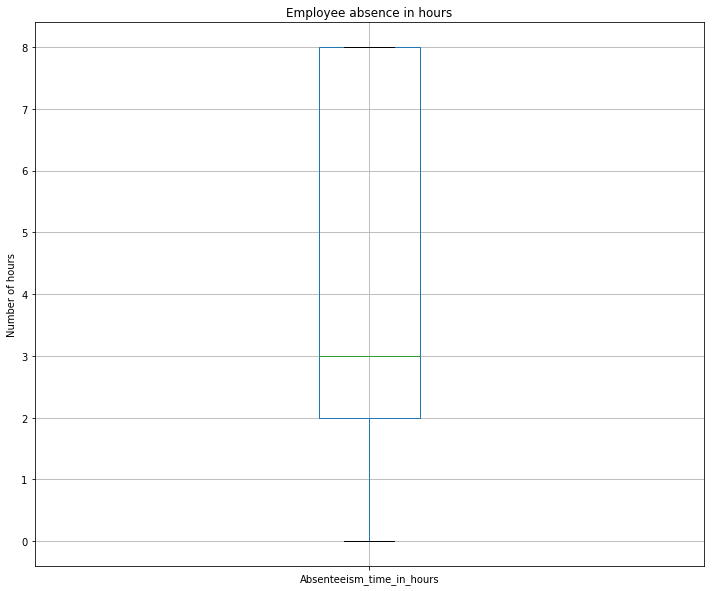

In [34]:
absent.Absenteeism_time_in_hours.plot(kind='box',figsize=(12,10))
plt.title("Employee absence in hours")
plt.ylabel('Number of hours')
plt.grid()
plt.show()

## Task 2.2

## Plot for Absenteesim in hours v/s Month

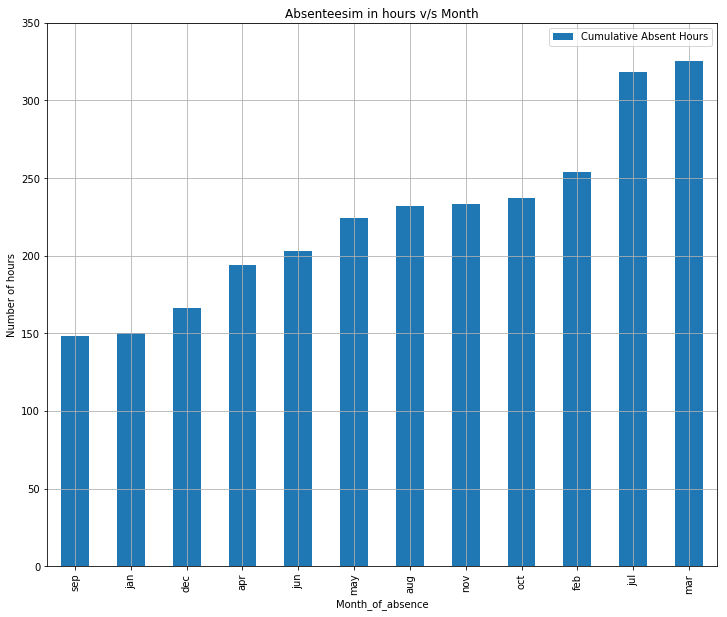

In [35]:
b=absent[absent.Month_of_absence=='May']
c=absent[absent.Month_of_absence=='Jun']
d=absent[absent.Month_of_absence=='Nov']
e=absent[absent.Month_of_absence=='Sept']
f=absent[absent.Month_of_absence=='July']
g=absent[absent.Month_of_absence=='August']
h=absent[absent.Month_of_absence=='Mar']
i=absent[absent.Month_of_absence=='Oct']
j=absent[absent.Month_of_absence=='Apr']
k=absent[absent.Month_of_absence=='Dec']
l=absent[absent.Month_of_absence=='Jan']
m=absent[absent.Month_of_absence=='Feb']

Ana={'Month_of_absence': ['may','jun','nov','sep','jul','aug','mar','oct','apr','dec','jan','feb'],
      'Cumulative Absent Hours': [b.Absenteeism_time_in_hours.sum(),c.Absenteeism_time_in_hours.sum(),d.Absenteeism_time_in_hours.sum(),e.Absenteeism_time_in_hours.sum()
                          ,f.Absenteeism_time_in_hours.sum(),g.Absenteeism_time_in_hours.sum(),h.Absenteeism_time_in_hours.sum(),i.Absenteeism_time_in_hours.sum(),
                          j.Absenteeism_time_in_hours.sum(),k.Absenteeism_time_in_hours.sum(),l.Absenteeism_time_in_hours.sum(),m.Absenteeism_time_in_hours.sum()]}

df=pd.DataFrame.from_dict(Ana)
df.set_index('Month_of_absence',inplace=True)
df.sort_values('Cumulative Absent Hours',inplace=True)
df.plot(kind='bar',ylim=(0,350),figsize=(12,10))
plt.title("Absenteesim in hours v/s Month")
plt.ylabel('Number of hours')
plt.grid()
plt.show()

## Absenteesim in hours v/s Day of week

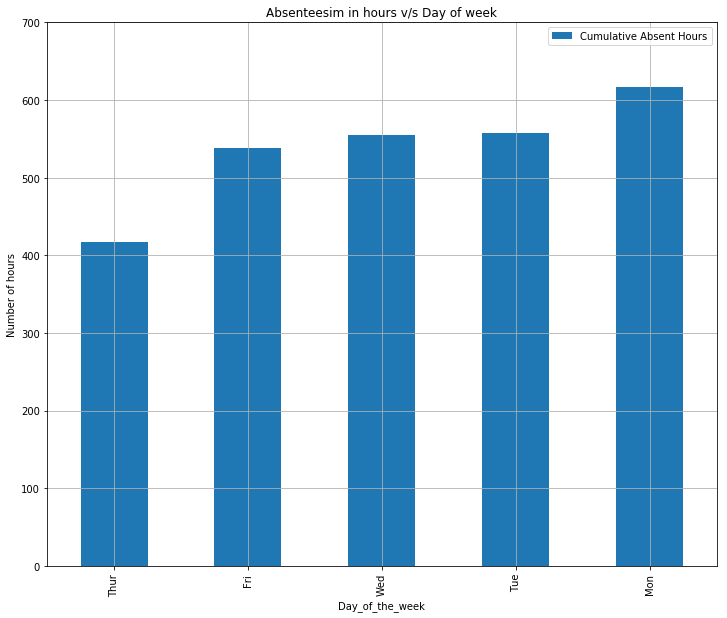

In [36]:
b=absent[absent.Day_of_the_week=='Mon']
c=absent[absent.Day_of_the_week=='Tue']
d=absent[absent.Day_of_the_week=='Wed']
e=absent[absent.Day_of_the_week=='Thur']
f=absent[absent.Day_of_the_week=='Fri']

Ana={'Day_of_the_week': ['Mon','Tue','Wed','Thur','Fri'],
      'Cumulative Absent Hours': [b.Absenteeism_time_in_hours.sum(),c.Absenteeism_time_in_hours.sum(),d.Absenteeism_time_in_hours.sum(),e.Absenteeism_time_in_hours.sum()
                          ,f.Absenteeism_time_in_hours.sum()]}

df=pd.DataFrame.from_dict(Ana)
df.set_index('Day_of_the_week',inplace=True)
df.sort_values('Cumulative Absent Hours',inplace=True)
df.plot(kind='bar',ylim=(0,700),figsize=(12,10))
plt.title("Absenteesim in hours v/s Day of week")
plt.ylabel('Number of hours')
plt.grid()
plt.show()

## Plot for Absenteesim in hours v/s Education(qualification) level

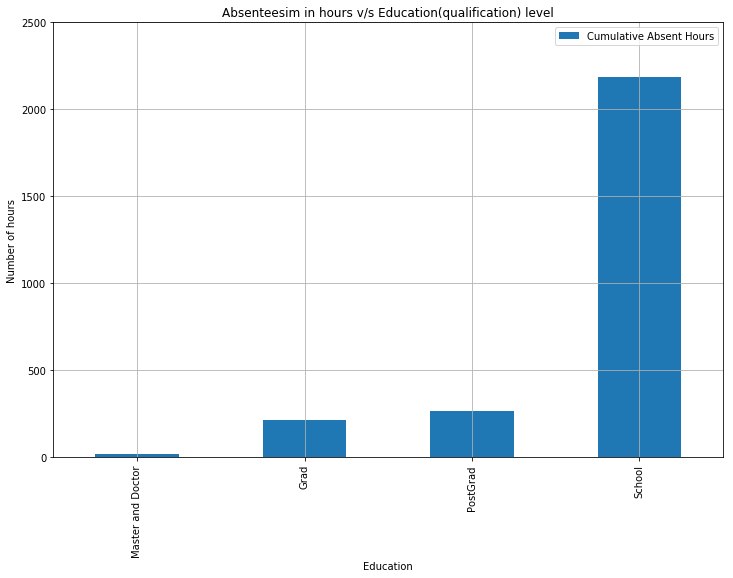

In [37]:
b=absent[absent.Education=='School']
c=absent[absent.Education=='Grad']
d=absent[absent.Education=='PostGrad']
e=absent[absent.Education=='Master and Doctor']


Ana={'Education': ['School','Grad','PostGrad','Master and Doctor'],
      'Cumulative Absent Hours': [b.Absenteeism_time_in_hours.sum(),c.Absenteeism_time_in_hours.sum(),d.Absenteeism_time_in_hours.sum(),e.Absenteeism_time_in_hours.sum()]}

df=pd.DataFrame.from_dict(Ana)
df.set_index('Education',inplace=True)
df.sort_values('Cumulative Absent Hours',inplace=True)
df.plot(kind='bar',ylim=(0,2500),figsize=(12,8))
plt.title("Absenteesim in hours v/s Education(qualification) level")
plt.ylabel('Number of hours')
plt.grid()
plt.show()


## Plot for Absenteesim in hours v/s BMI, Weight, Height

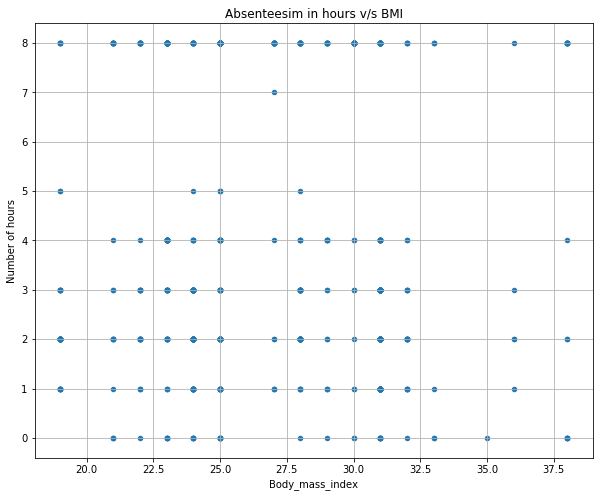

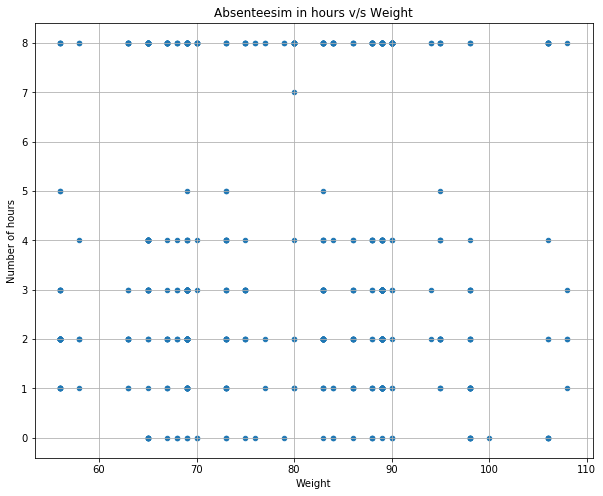

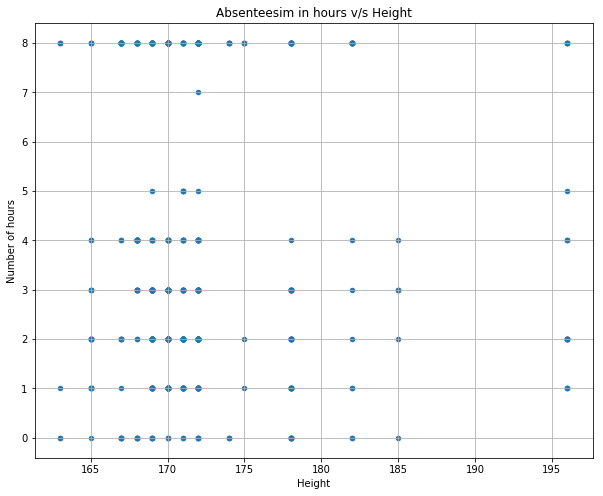

In [38]:

absent.plot(kind='scatter',x='Body_mass_index',y='Absenteeism_time_in_hours',figsize=(10,8))
plt.title("Absenteesim in hours v/s BMI")
plt.ylabel('Number of hours')
plt.grid()
plt.show()

absent.plot(kind='scatter',x='Weight',y='Absenteeism_time_in_hours',figsize=(10,8))
plt.title("Absenteesim in hours v/s Weight")
plt.ylabel('Number of hours')
plt.grid()
plt.show()

absent.plot(kind='scatter',x='Height',y='Absenteeism_time_in_hours',figsize=(10,8))
plt.title("Absenteesim in hours v/s Height")
plt.ylabel('Number of hours')
plt.grid()
plt.show()

## Plot for Absenteesim in hours v/s Percentage of Targets Achieved 

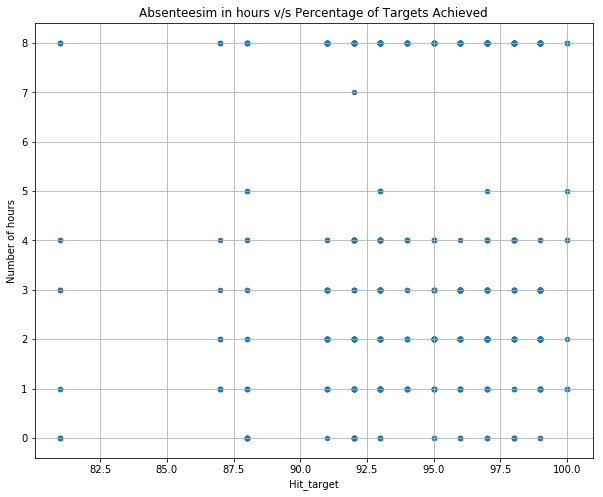

In [39]:
absent.plot(kind='scatter',x='Hit_target',y='Absenteeism_time_in_hours',figsize=(10,8))
plt.title("Absenteesim in hours v/s Percentage of Targets Achieved")
plt.ylabel('Number of hours')
plt.grid()
plt.show()

## Plot for Absenteesim in hours v/s Season

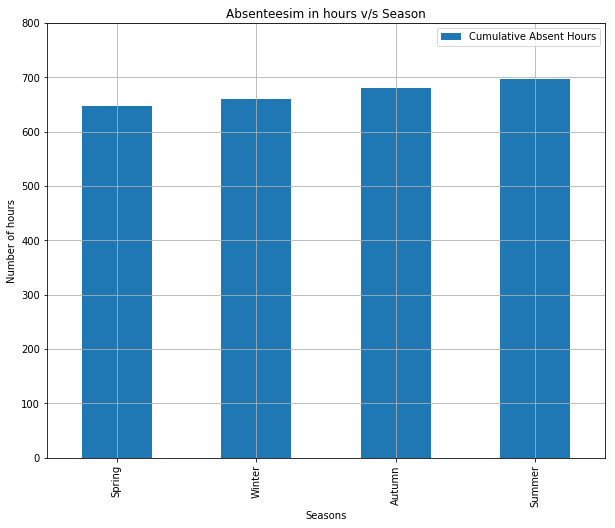

In [40]:
b=absent[absent.Seasons=='Summer']
c=absent[absent.Seasons=='Winter']
d=absent[absent.Seasons=='Spring']
e=absent[absent.Seasons=='Autumn']


Ana={'Seasons': ['Summer','Winter','Spring','Autumn'],
      'Cumulative Absent Hours': [b.Absenteeism_time_in_hours.sum(),c.Absenteeism_time_in_hours.sum(),d.Absenteeism_time_in_hours.sum(),e.Absenteeism_time_in_hours.sum()]}

df=pd.DataFrame.from_dict(Ana)
df.set_index('Seasons',inplace=True)
df.sort_values('Cumulative Absent Hours',inplace=True)
df.plot(kind='bar',ylim=(0,800),figsize=(10,8))
plt.title("Absenteesim in hours v/s Season")
plt.ylabel('Number of hours')
plt.grid()
plt.show()

## Plot for Absenteesim in hours v/s Transportation Expense

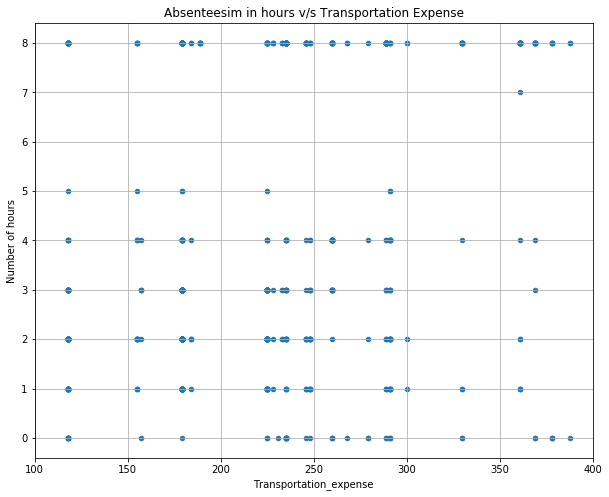

In [41]:
absent.plot(kind='scatter',x='Transportation_expense',y='Absenteeism_time_in_hours',xlim=(100,400),figsize=(10,8))
plt.title("Absenteesim in hours v/s Transportation Expense")
plt.ylabel('Number of hours')
plt.grid()
plt.show()

In [42]:
## Plot for Absenteesim in hours v/s scatter

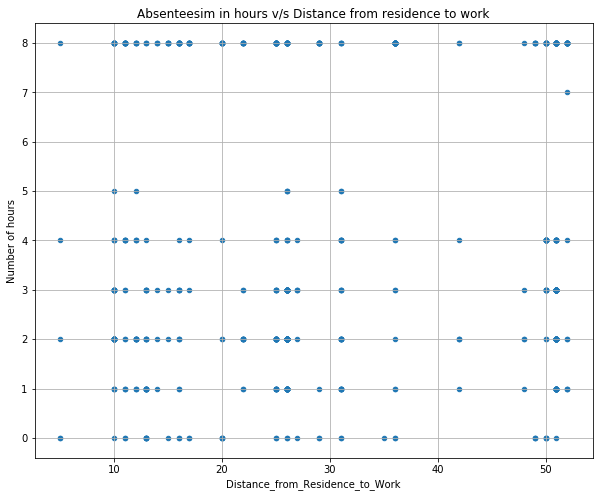

In [43]:
absent.plot(kind='scatter',x='Distance_from_Residence_to_Work',y='Absenteeism_time_in_hours',figsize=(10,8))
plt.title("Absenteesim in hours v/s Distance from residence to work")
plt.ylabel('Number of hours')
plt.grid()
plt.show()

## Plot for Absenteesim in hours v/s Age

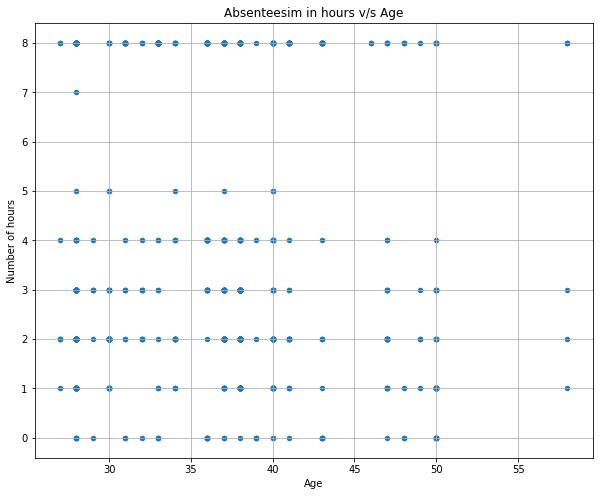

In [44]:
absent.plot(kind='scatter',x='Age',y='Absenteeism_time_in_hours',figsize=(10,8))
plt.title("Absenteesim in hours v/s Age")
plt.ylabel('Number of hours')
plt.grid()
plt.show()

In [45]:
## Plot for Absenteesim in hours v/s Number_Of_Children

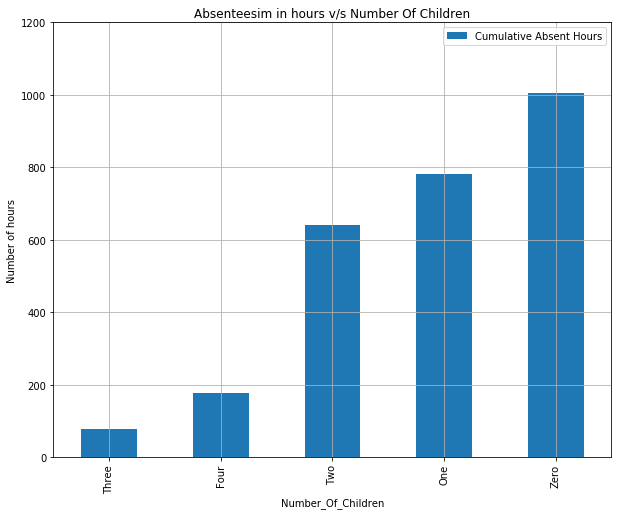

In [46]:
b=absent[absent.Number_Of_Children==0].Absenteeism_time_in_hours.sum()
c=absent[absent.Number_Of_Children==1].Absenteeism_time_in_hours.sum()
d=(absent[absent.Number_Of_Children==2]).Absenteeism_time_in_hours.sum()
e=absent[absent.Number_Of_Children==3].Absenteeism_time_in_hours.sum()
f=absent[absent.Number_Of_Children==4].Absenteeism_time_in_hours.sum()

Ana={'Number_Of_Children': ['Zero','One','Two','Three','Four'],
      'Cumulative Absent Hours': [b,c,d,e,f]}

df=pd.DataFrame.from_dict(Ana)
df.set_index('Number_Of_Children',inplace=True)
df.sort_values('Cumulative Absent Hours',inplace=True)
df.plot(kind='bar',ylim=(0,1200),figsize=(10,8))
plt.title("Absenteesim in hours v/s Number Of Children")
plt.ylabel('Number of hours')
plt.grid()
plt.show()


In [47]:
## Plot for Absenteesim in hours v/s Number_Of_Children

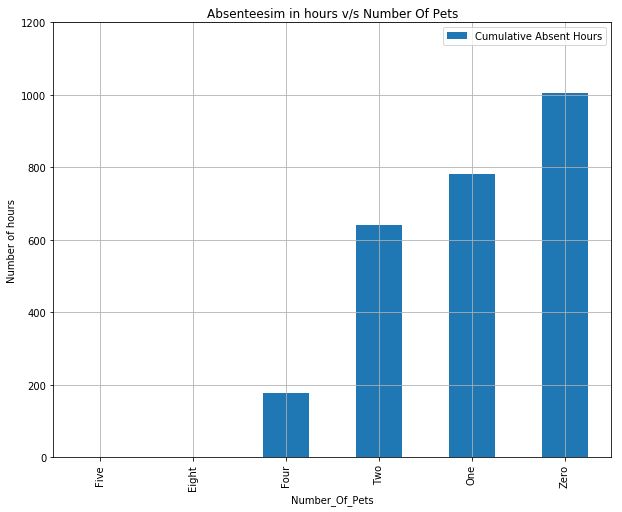

In [48]:
b=absent[absent.Number_Of_Children==0].Absenteeism_time_in_hours.sum()
c=absent[absent.Number_Of_Children==1].Absenteeism_time_in_hours.sum()
d=(absent[absent.Number_Of_Children==2]).Absenteeism_time_in_hours.sum()
e=absent[absent.Number_Of_Children==4].Absenteeism_time_in_hours.sum()
f=absent[absent.Number_Of_Children==5].Absenteeism_time_in_hours.sum()
g=absent[absent.Number_Of_Children==8].Absenteeism_time_in_hours.sum()

Ana={'Number_Of_Pets': ['Zero','One','Two','Four','Five','Eight'],
      'Cumulative Absent Hours': [b,c,d,e,f,g]}

df=pd.DataFrame.from_dict(Ana)
df.set_index('Number_Of_Pets',inplace=True)
df.sort_values('Cumulative Absent Hours',inplace=True)
df.plot(kind='bar',ylim=(0,1200),figsize=(10,8))
plt.title("Absenteesim in hours v/s Number Of Pets")
plt.ylabel('Number of hours')
plt.grid()
plt.show()

In [49]:
## Plot for Absenteesim in hours v/s Social_drinker,Social Smoker

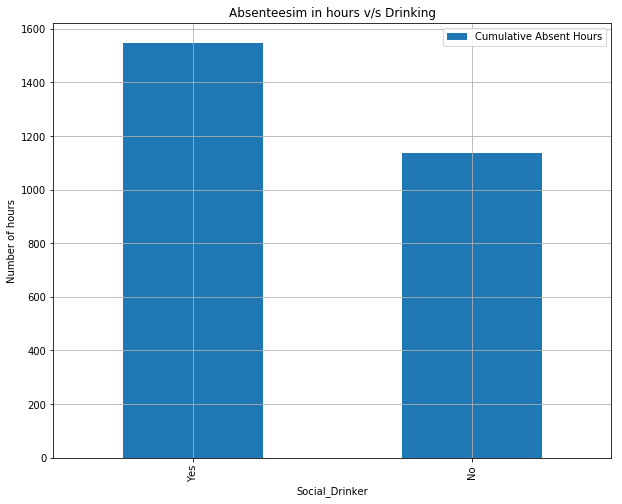

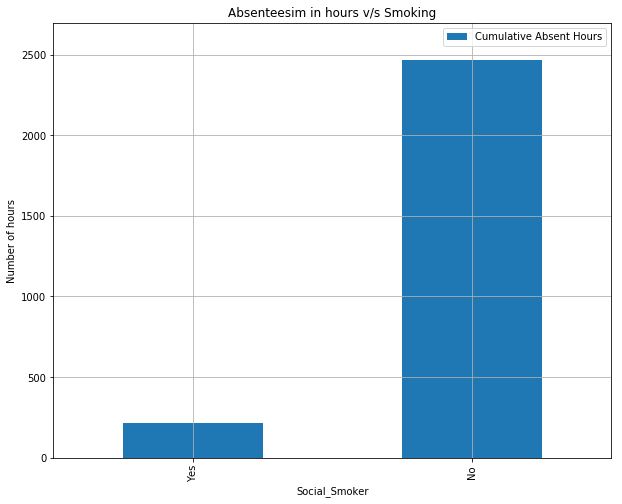

In [50]:
c=absent[absent.Social_drinker=='Yes'].Absenteeism_time_in_hours.sum()
d=(absent[absent.Social_drinker=='No']).Absenteeism_time_in_hours.sum()
e=absent[absent.Social_smoker=='Yes'].Absenteeism_time_in_hours.sum()
f=absent[absent.Social_smoker=='No'].Absenteeism_time_in_hours.sum()


Ana={'Social_Drinker': ['Yes','No',],
      'Cumulative Absent Hours': [c,d]}
Ana1={'Social_Smoker': ['Yes','No',],
      'Cumulative Absent Hours': [e,f]}


df=pd.DataFrame.from_dict(Ana)
df.set_index('Social_Drinker',inplace=True)
df.plot(kind='bar',figsize=(10,8))
plt.title("Absenteesim in hours v/s Drinking")
plt.ylabel('Number of hours')
plt.grid()
plt.show()

df1=pd.DataFrame.from_dict(Ana1)
df1.set_index('Social_Smoker',inplace=True)
df1.plot(kind='bar',figsize=(10,8), ylim=(0, 2700))
plt.title("Absenteesim in hours v/s Smoking")
plt.ylabel('Number of hours')
plt.grid()
plt.show()

In [51]:
## Plot for Absenteesim in hours v/s Aversge Workload

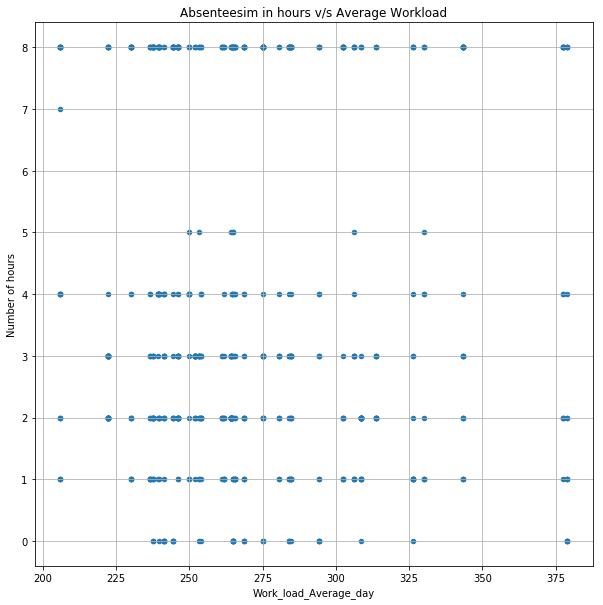

In [52]:
absent.plot(kind='scatter',x='Work_load_Average_day',y='Absenteeism_time_in_hours',figsize=(10,10))
plt.title("Absenteesim in hours v/s Average Workload")
plt.ylabel('Number of hours')
plt.grid()
plt.show()

# Task 3 Data Modeling

In [53]:
# Creating target variable with three Categories
absent_model.loc[absent.Absenteeism_time_in_hours <= 4, 'Target'] = "Half"
absent_model.loc[absent.Absenteeism_time_in_hours > 4, 'Target'] = "Full"
absent_model.loc[absent.Absenteeism_time_in_hours == 0, 'Target'] = "Nil"
absent_model= absent_model.drop('Absenteeism_time_in_hours',axis=1)

In [54]:
absent_model.shape

(674, 20)

In [55]:
absent.shape

(674, 20)

In [56]:
absent_model["Target"].value_counts()

Half    417
Full    216
Nil      41
Name: Target, dtype: int64

In [57]:
# Import packages for modeling
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeClassifier  
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.utils import shuffle
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split


# K Nearest Neighbours Classification

In [58]:
#Test Suite For K Neighbours to decide which value of K to select
for val in range(1,20):
    indexes = []
    max_score_current = 0.0
    max_pre=0.0
    col_index = 18
    a=absent_model.iloc[:,19]
    random_col_index = shuffle(range(0,col_index), random_state=1)
    kf= KFold(n_splits=6,random_state=1)

    for current_index in range(0, col_index):
        indexes.append(random_col_index[current_index])
        selected_data = absent_model.iloc[:, indexes]
        for  c,d in kf.split(selected_data):   # Cross validation
            x_train, x_test = selected_data.iloc[c],selected_data.iloc[d]
            y_train, y_test = a.iloc[c],a.iloc[d]
        clf = KNeighborsClassifier(val,weights='distance',p=2) # K neighbours classifier
        fit = clf.fit(x_train, y_train)
        score_current = clf.score(x_test, y_test)
        if score_current < max_score_current:
            indexes.remove(random_col_index[current_index])
        else:
            max_score_current = score_current
            
    y_new_pre = fit.predict(x_test) # Prediction for new data set
    pre=round(precision_score(y_test,y_new_pre,average='weighted'),2)
    cm = confusion_matrix(y_test, y_new_pre)
    print cm
    print "With K-Neighbours value as " + str(val) + " we get a average precesion of " + str(pre)
    

   
        

[[20 15  0]
 [13 60  0]
 [ 1  0  3]]
With K-Neighbours value as 1 we get a average precesion of 0.74
[[22 13  0]
 [17 56  0]
 [ 1  0  3]]
With K-Neighbours value as 2 we get a average precesion of 0.74
[[23 12  0]
 [12 60  1]
 [ 1  0  3]]
With K-Neighbours value as 3 we get a average precesion of 0.77
[[23 12  0]
 [12 60  1]
 [ 1  0  3]]
With K-Neighbours value as 4 we get a average precesion of 0.77
[[22 13  0]
 [13 59  1]
 [ 1  0  3]]
With K-Neighbours value as 5 we get a average precesion of 0.75
[[22 13  0]
 [16 56  1]
 [ 1  0  3]]
With K-Neighbours value as 6 we get a average precesion of 0.73
[[22 13  0]
 [13 59  1]
 [ 1  0  3]]
With K-Neighbours value as 7 we get a average precesion of 0.75
[[19 16  0]
 [11 61  1]
 [ 1  0  3]]
With K-Neighbours value as 8 we get a average precesion of 0.73
[[25 10  0]
 [14 58  1]
 [ 1  0  3]]
With K-Neighbours value as 9 we get a average precesion of 0.78
[[17 18  0]
 [ 8 65  0]
 [ 0  1  3]]
With K-Neighbours value as 10 we get a average precesi

In [59]:
# hill climbing for selecting features 
indexes = []
max_score_current = 0.0
col_index = 18
random_col_index = shuffle(range(0,col_index), random_state=1)
a=absent_model.iloc[:,19]
kf= KFold(n_splits=6,random_state=1)

for current_index in range(0, col_index):
        indexes.append(random_col_index[current_index])
        selected_data = absent_model.iloc[:, indexes]
        for  c,d in kf.split(selected_data):
            x_train, x_test = selected_data.iloc[c],selected_data.iloc[d]
            y_train, y_test = a.iloc[c],a.iloc[d]
        clf = KNeighborsClassifier(9,weights='distance',p=2) # 
        fit = clf.fit(x_train, y_train)
        score_current = clf.score(x_test, y_test)
        if score_current < max_score_current:
            indexes.remove(random_col_index[current_index])
        else:
            max_score_current = score_current
            print "Score with " + str(indexes) + " selected features: " + str(score_current)
            


Score with [6] selected features: 0.6875
Score with [6, 14] selected features: 0.6875
Score with [6, 14, 7] selected features: 0.6875
Score with [6, 14, 7, 10] selected features: 0.7142857142857143
Score with [6, 14, 7, 10, 0] selected features: 0.7767857142857143
Score with [6, 14, 7, 10, 0, 16] selected features: 0.7857142857142857
Score with [6, 14, 7, 10, 0, 16, 12] selected features: 0.7857142857142857
Score with [6, 14, 7, 10, 0, 16, 12, 11] selected features: 0.7857142857142857


In [60]:
y_new_pre = fit.predict(x_test)
pre=round(precision_score(y_test,y_new_pre,average='weighted'),2)
cm = confusion_matrix(y_test, y_new_pre)
print cm

[[25 10  0]
 [14 58  1]
 [ 1  0  3]]


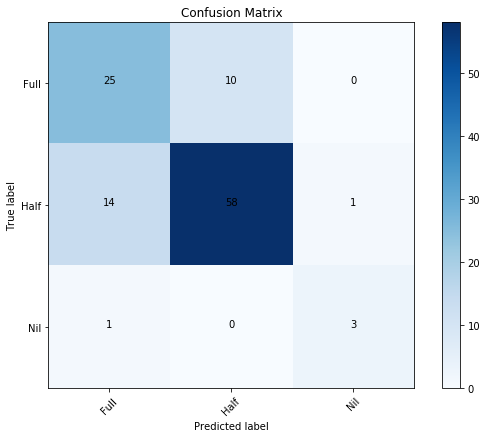

In [61]:
# Custom Function to plot Confusion matrix
import numpy as np


def plot_confusion_matrix(cm1,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
  
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools


    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)
        
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):   
        plt.text(j, i, "{:,}".format(cm[i, j]),horizontalalignment="center",color="black" )

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    

plot_confusion_matrix(cm,           
                      target_names = ['Full', 'Half', 'Nil'],
                      title        = "Confusion Matrix")

In [62]:
#Error rate
round((1-accuracy_score(y_test,y_new_pre))*100,2)

23.21

In [63]:
# Classification Report 
print classification_report(y_test,y_new_pre)

             precision    recall  f1-score   support

       Full       0.62      0.71      0.67        35
       Half       0.85      0.79      0.82        73
        Nil       0.75      0.75      0.75         4

avg / total       0.78      0.77      0.77       112



# Decision Tree Classification

In [64]:
# Test Suite For Decision Tree
approach=['gini','entropy']
for val in approach:
    indexes = []
    max_score_current = 0.0
    max_pre=0.0
    col_index = 18
    random_col_index = shuffle(range(0,col_index), random_state=1)
    a=absent_model.iloc[:,19]
    kf= KFold(n_splits=6,random_state=1)

    for current_index in range(0, col_index):
            indexes.append(random_col_index[current_index])
            selected_data = absent_model.iloc[:, indexes]
            for  c,d in kf.split(selected_data):
                x_train, x_test = selected_data.iloc[c],selected_data.iloc[d]
                y_train, y_test = a.iloc[c],a.iloc[d]
            clf = DecisionTreeClassifier(criterion=val,random_state=1)
            fit = clf.fit(x_train, y_train)
            score_current = clf.score(x_test, y_test)
            if score_current < max_score_current:
                indexes.remove(random_col_index[current_index])
            else:
                max_score_current = score_current

    y_new_pre = fit.predict(x_test)
    pre=round(precision_score(y_test,y_new_pre,average='weighted'),2)
    cm = confusion_matrix(y_test, y_new_pre)
    print cm
    print "With Decision tree approach as " + str(val) + " we get a average precesion of " + str(pre)

[[24 11  0]
 [12 61  0]
 [ 0  0  4]]
With Decision tree approach as gini we get a average precesion of 0.8
[[18 17  0]
 [ 7 66  0]
 [ 0  0  4]]
With Decision tree approach as entropy we get a average precesion of 0.78


In [65]:
indexes = []
max_score_current = 0.0
max_pre=0.0
col_index = 18
random_col_index = shuffle(range(0,col_index), random_state=1)
a=absent_model.iloc[:,19]
kf= KFold(n_splits=6,random_state=1)

for current_index in range(0, col_index):
        indexes.append(random_col_index[current_index])
        selected_data = absent_model.iloc[:, indexes]
        for  c,d in kf.split(selected_data):
                x_train, x_test = selected_data.iloc[c],selected_data.iloc[d]
                y_train, y_test = a.iloc[c],a.iloc[d]
        clf = DecisionTreeClassifier(criterion='gini',random_state=1)
        fit = clf.fit(x_train, y_train)
        score_current = clf.score(x_test, y_test)
        if score_current < max_score_current:
            indexes.remove(random_col_index[current_index])
        else:
            max_score_current = score_current
            print "Score with " + str(indexes) + " selected features: " + str(score_current)

Score with [6] selected features: 0.6696428571428571
Score with [6, 13] selected features: 0.6785714285714286
Score with [6, 13, 14] selected features: 0.6785714285714286
Score with [6, 13, 14, 7] selected features: 0.6875
Score with [6, 13, 14, 7, 15] selected features: 0.6875
Score with [6, 13, 14, 7, 15, 4] selected features: 0.6875
Score with [6, 13, 14, 7, 15, 4, 10] selected features: 0.7232142857142857
Score with [6, 13, 14, 7, 15, 4, 10, 0] selected features: 0.8035714285714286
Score with [6, 13, 14, 7, 15, 4, 10, 0, 12] selected features: 0.8035714285714286
Score with [6, 13, 14, 7, 15, 4, 10, 0, 12, 11] selected features: 0.8035714285714286


In [66]:
y_new_pre = fit.predict(x_test)
cm = confusion_matrix(y_test, y_new_pre)
print cm

[[24 11  0]
 [12 61  0]
 [ 0  0  4]]


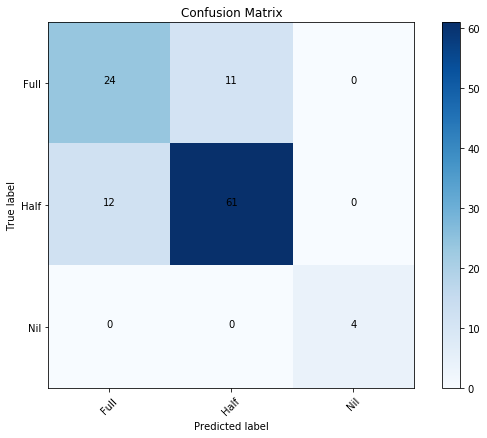

In [67]:
plot_confusion_matrix(cm,           
                      target_names = ['Full', 'Half', 'Nil'],
                      title        = "Confusion Matrix")

In [68]:
#Error rate
round((1-accuracy_score(y_test,y_new_pre))*100,2)

20.54

In [69]:
# Classification Report 
print classification_report(y_test,y_new_pre)

             precision    recall  f1-score   support

       Full       0.67      0.69      0.68        35
       Half       0.85      0.84      0.84        73
        Nil       1.00      1.00      1.00         4

avg / total       0.80      0.79      0.80       112



# Extensions

## Naives Bayes Gausian Classification

In [70]:
indexes = []
max_score_current = 0.0
max_pre=0.0
col_index = 18
random_col_index = shuffle(range(0,col_index), random_state=1)
a=absent_model.iloc[:,19]
kf= KFold(n_splits=6,random_state=1)

for current_index in range(0, col_index):
        indexes.append(random_col_index[current_index])
        selected_data = absent_model.iloc[:, indexes]
        for  c,d in kf.split(selected_data):
                x_train, x_test = selected_data.iloc[c],selected_data.iloc[d]
                y_train, y_test = a.iloc[c],a.iloc[d]
        clf = GaussianNB()
        fit = clf.fit(x_train, y_train)
        score_current = clf.score(x_test, y_test)
        if score_current < max_score_current:
            indexes.remove(random_col_index[current_index])
        else:
            max_score_current = score_current
            print "Score with " + str(indexes) + " selected features: " + str(score_current)

Score with [6] selected features: 0.6517857142857143
Score with [6, 3] selected features: 0.6517857142857143
Score with [6, 3, 13] selected features: 0.6517857142857143
Score with [6, 3, 13, 2] selected features: 0.6696428571428571
Score with [6, 3, 13, 2, 14] selected features: 0.6785714285714286
Score with [6, 3, 13, 2, 14, 15] selected features: 0.6875
Score with [6, 3, 13, 2, 14, 15, 4] selected features: 0.6875
Score with [6, 3, 13, 2, 14, 15, 4, 1] selected features: 0.6875
Score with [6, 3, 13, 2, 14, 15, 4, 1, 10] selected features: 0.7589285714285714
Score with [6, 3, 13, 2, 14, 15, 4, 1, 10, 17] selected features: 0.7589285714285714
Score with [6, 3, 13, 2, 14, 15, 4, 1, 10, 17, 16] selected features: 0.7678571428571429
Score with [6, 3, 13, 2, 14, 15, 4, 1, 10, 17, 16, 11] selected features: 0.7678571428571429
Score with [6, 3, 13, 2, 14, 15, 4, 1, 10, 17, 16, 11, 5] selected features: 0.7678571428571429


In [71]:
y_new_pre = fit.predict(x_test)
cm = confusion_matrix(y_test, y_new_pre)
print cm

[[14 21  0]
 [ 5 68  0]
 [ 0  0  4]]


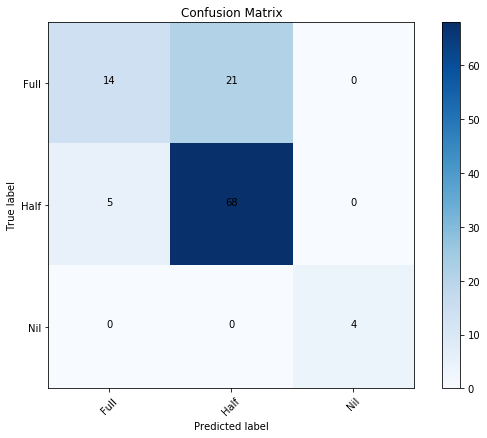

In [72]:
plot_confusion_matrix(cm,           
                      target_names = ['Full', 'Half', 'Nil'],
                      title        = "Confusion Matrix")

In [73]:
#Error report
round((1-accuracy_score(y_test,y_new_pre))*100,2)

23.21

In [74]:
# Classification Report 
print classification_report(y_test,y_new_pre)

             precision    recall  f1-score   support

       Full       0.74      0.40      0.52        35
       Half       0.76      0.93      0.84        73
        Nil       1.00      1.00      1.00         4

avg / total       0.76      0.77      0.74       112

